In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = data.copy()
tf = test.copy()

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop("Name",axis = 1)

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.shape

(891, 11)

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df = df.drop("Cabin",axis = 1)

In [9]:
# we will use hot-deck-imputation for missing values of df age
def hot_deck_imputation(df, target_variable, matching_variables):
    for index, row in df.iterrows():
        if pd.isnull(row[target_variable]):
            matching_criteria = row[matching_variables]
            similar_individuals = df.dropna(subset=[target_variable]).loc[
                (df[matching_variables] == matching_criteria).all(axis=1)]
            if len(similar_individuals) > 0:
                imputed_value = similar_individuals.sample(n=1)[target_variable].values[0]
                df.loc[index, target_variable] = imputed_value

    return df

target_variable = "Age"
matching_variables = ['Sex', "Survived","Pclass"]
# Perform hot-deck imputation
data_imputed = hot_deck_imputation(df, target_variable, matching_variables)
#print(data_imputed)
df = data_imputed

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
# Find the mode of the 'Embarked' column
mode_embarked = df['Embarked'].mode().values[0]

# Replace missing values with the mode
df['Embarked'].fillna(mode_embarked, inplace=True)

In [12]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


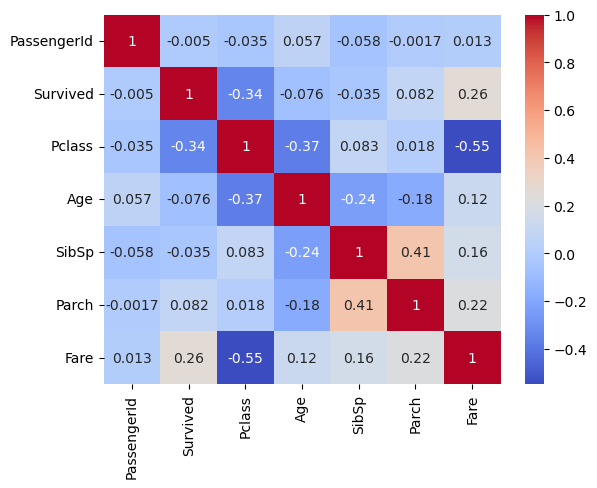

In [14]:
# lets check multicollinearity
import matplotlib.pyplot as plt
import seaborn as sns

# Create correlation matrix
corr_matrix = df.corr()

# Plot correlation matrix heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [15]:
# Compute eigenvalues
eigenvalues, _ = np.linalg.eig(corr_matrix)

# Calculate condition number
condition_number = np.max(eigenvalues) / np.min(eigenvalues)

print(condition_number)

# Eigenvalues or Condition Number: 
#     Perform an eigenvalue decomposition of the correlation matrix or 
#     calculate the condition number. High eigenvalues or 
#     a large condition number (>30) suggest multicollinearity.

5.448540636745224


In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [17]:
# custom mapping for Embarked
embarked_mapping = {'C': 0, 'Q': 1, 'S': 2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)

# custom mapping for Sex
Sex_mapping = {'male': 0, 'female' : 1}
df['Sex'] = df['Sex'].map(Sex_mapping)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,1,35.0,1,0,113803,53.1000,2
4,5,0,3,0,35.0,0,0,373450,8.0500,2


In [19]:
# Lets build Decision Tree
from sklearn.model_selection import train_test_split as tts
x = df[["Age","Sex","Embarked","Pclass"]]
y = df["Survived"]
xtrain = x
ytrain = y
#xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.2,random_state=1)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
#ypredtrain = dtc.predict(xtrain)
#ypredtest = dtc.predict(xtest)

DecisionTreeClassifier()

In [21]:
# from sklearn.metrics import accuracy_score
# print("Accuracy of training ", accuracy_score(ytrain,ypredtrain))
# print("Accuracy of testing ", accuracy_score(ytest,ypredtest))

In [22]:
tf.shape

(418, 11)

In [23]:
tf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
tf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
# missing values for AGe in test
from sklearn.impute import KNNImputer

# Define the imputer
imputer = KNNImputer(n_neighbors=5)

# Prepare the data for imputation
imputation_data = tf[['Pclass', 'SibSp', 'Parch', 'Fare']]

# Perform imputation
tf['Age'] = imputer.fit_transform(imputation_data)

In [26]:
tf.drop("Cabin",axis = True, inplace = True)

In [27]:
tf.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [28]:
# Find the mode of the 'Embarked' column
modeembarked = tf['Embarked'].mode().values[0]

# Replace missing values with the mode
tf['Embarked'].fillna(modeembarked, inplace=True)

In [29]:
tf.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [30]:
# custom mapping for Embarked
embarkedmapping = {'C': 0, 'Q': 1, 'S': 2}
tf['Embarked'] = tf['Embarked'].map(embarkedmapping)

# custom mapping for Sex
Sexmapping = {'male': 0, 'female' : 1}
tf['Sex'] = tf['Sex'].map(Sexmapping)

In [31]:
xt = tf[["Age","Sex","Embarked","Pclass"]]

In [32]:
ytp = dtc.predict(xt)

In [33]:
# how to export into csv
results = pd.DataFrame({'PassengerId': tf['PassengerId'], 'Survived': ytp})
results.to_csv('Full_gender_submission.csv', index=False)

In [34]:
tf.shape

(418, 10)

In [35]:
results_418 = results.head(418)
results_418.to_csv('gender_submission.csv', index=False)

In [36]:
results_418.shape

(418, 2)